# Logistic Regression



#### 1. First, let's import all necessary libraries. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from   sklearn.linear_model import LogisticRegression
from   sklearn.preprocessing import MinMaxScaler
from   sklearn.model_selection import train_test_split
from   sklearn.metrics import confusion_matrix, accuracy_score

#### 2.  Import and prepare data for our study.

In [3]:
data = pd.read_csv("Data/diagnosis.csv")
data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data["diagnosis"]  = data["diagnosis"].apply(lambda x: 1 if x == 'M' else 0)     
data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
feature  = data["radius_mean"].values.reshape(-1,1)

# Scale the feature
scaler = MinMaxScaler().fit(feature)
x = scaler.transform(feature)
#print(scaler.data_max_)
#print(scaler.data_min_)

y  = data["diagnosis"]

Here is how our studied data looklike. 

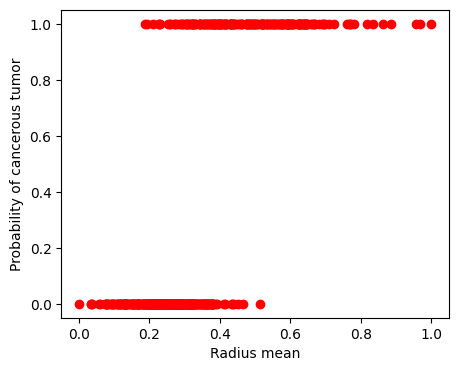

In [6]:
plt.figure(figsize=(5, 4))
plt.scatter(x, y, c='red')
plt.xlabel("Radius mean")
plt.ylabel("Probability of cancerous tumor")
plt.show()

#### 3. Now we are ready to train our logistic model. 

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [8]:
model = LogisticRegression()
model.fit(x_train, y_train)
a = model.coef_
b = model.intercept_
print("trained model parameters are:")
print(a, b)

trained model parameters are:
[[8.1309673]] [-3.29251389]


Let's take a close look of the trained results. 

In [10]:
y_predict       = model.predict(x_train)
y_predict_prob  = model.predict_proba(x_train)

print('Actual class    ', 'Predicted class     ',  'Predicted probabilities')
ytrain = y_train.values
for n in range(0, len(y_train)):
    print(ytrain[n], '              ', y_predict[n], '                  ', y_predict_prob[n])

Actual class     Predicted class      Predicted probabilities
0                0                    [0.74506417 0.25493583]
0                0                    [0.90541324 0.09458676]
0                0                    [0.81866232 0.18133768]
0                0                    [0.89829714 0.10170286]
1                1                    [0.23458216 0.76541784]
0                0                    [0.66629647 0.33370353]
0                0                    [0.74065371 0.25934629]
0                0                    [0.58076097 0.41923903]
1                1                    [0.3557557 0.6442443]
0                0                    [0.85718225 0.14281775]
0                0                    [0.88632722 0.11367278]
0                0                    [0.62585195 0.37414805]
1                1                    [0.33231427 0.66768573]
0                0                    [0.87668484 0.12331516]
0                0                    [0.71474218 0.28525782]
1         

#### 4. Model evaluation

In [11]:
ypred_train        = model.predict(x_train)
accuracy_train     = accuracy_score(ypred_train, y_train)
conf_matrix_train  = confusion_matrix(ypred_train, y_train)
print('Accuracy for training data: ', accuracy_train, '\n')
print('Confusion matrix for training data:\n', conf_matrix_train, '\n')

ypred_test         = model.predict(x_test)
accuracy_test      = accuracy_score(y_test,ypred_test)
conf_matrix_test   = confusion_matrix(y_test, ypred_test)
print('Accuracy for test data: ', accuracy_test, '\n')
print('Confusion matrix for test data:\n', conf_matrix_test, '\n')

Accuracy for training data:  0.8637362637362638 

Confusion matrix for training data:
 [[275  57]
 [  5 118]] 

Accuracy for test data:  0.868421052631579 

Confusion matrix for test data:
 [[74  3]
 [12 25]] 



#### 5. New prediction?

In [12]:
xnew        = np.array([12, 13, 14, 15, 16, 17])
xnew        = xnew.reshape(-1, 1)
xnew_scaled = scaler.transform(xnew)
pred_class  = model.predict(xnew_scaled)
pred_prob   = model.predict_proba(xnew_scaled)
for i in range(0, len(xnew_scaled)):
    print(pred_class[i], pred_prob[i])

0 [0.79593472 0.20406528]
0 [0.72636395 0.27363605]
0 [0.64369256 0.35630744]
0 [0.55146762 0.44853238]
1 [0.45556188 0.54443812]
1 [0.36284257 0.63715743]


#### More discussion

In [14]:
model = LogisticRegression(penalty=None, tol = 0.00001)
model.fit(x_train, y_train)
a = model.coef_
b = model.intercept_
print(a, b)

[[23.4860323]] [-8.50430851]
